# 3-2 厳選！頻出テクニック（１）


## しゃくとり法


![syakutori](assets/syakutori_warm.jpg)


In [1]:
# Subsequence（二分探索）

import itertools

n: int
S: int
a: list[int]


def solve() -> None:
    acc = list(itertools.accumulate(a, initial=0))

    ans = float('inf')
    for i in range(1, n + 1):
        lo = 0
        hi = i
        if acc[i] < S:
            continue
        c = lambda x: acc[i] - acc[x] < S
        while hi - lo > 1:
            mid = (hi + lo) // 2
            if c(mid):
                hi = mid
            else:
                lo = mid
        ans = min(ans, i - lo)

    return ans

In [2]:
n = 10
S = 15
a = [5, 1, 3, 5, 10, 7, 4, 9, 2, 8]

solve()

2

In [3]:
n = 5
S = 11
a = [1, 2, 3, 4, 5]

solve()

3

In [4]:
# Subsequence（二分探索，区間の左側を全探索する場合）

import itertools

n: int
S: int
a: list[int]


def solve() -> None:
    acc = list(itertools.accumulate(a, initial=0))

    ans = float('inf')
    for i in range(n):
        lo = 0
        hi = n
        c = lambda x: acc[x] - acc[i] > S
        while hi - lo > 1:
            mid = (hi + lo) // 2
            if c(mid):
                hi = mid
            else:
                lo = mid
        if acc[hi] - acc[i] > S:
            print(f'left={i}, right={hi}')
            ans = min(ans, hi - i)

    return ans

In [5]:
n = 10
S = 15
a = [5, 1, 3, 5, 10, 7, 4, 9, 2, 8]

solve()

left=0, right=5
left=1, right=5
left=2, right=5
left=3, right=6
left=4, right=6
left=5, right=8
left=6, right=10
left=7, right=10


2

In [6]:
n = 5
S = 11
a = [1, 2, 3, 4, 5]

solve()

left=0, right=5
left=1, right=5
left=2, right=5


3

### 観察


-   区間の左端，右端は，左＜右を満たしながら単調増加
-   区間の左端を固定した時，条件を満たすような区間の右端を二分探索以上に高速に探索できないか


### しゃくとり法の一般化


```py
n: int  # 走査する区間の長さ

right = 0
for left in range(n):
    while right < n and (...):  # rightを一つ進めてもokか確認
        (...)  # 処理
        right += 1

    # 現在のrightは条件を満たす最大値なので，ansを変化させ得る
    ans = ...

    # 次のleftに移る前準備
    (...)
```


有効な場面

-   「条件」を満たす区間 (連続する部分列) のうち、最小の長さを求めよ
-   「条件」を満たす区間 (連続する部分列) のうち、最大の長さを求めよ
-   「条件」を満たす区間 (連続する部分列) を数え上げよ


-   条件を満たす区間に**単調性**が見られる場合

Q. $\sum_{i=left}^{right}{A_i}>15$ となる $left, right$ は？ $A_i=\{5, 1, 3, 5, 10, 7, 4, 9, 2, 8\}$  
A. $left$ を固定すると，$right$ は単調増加する
| 5 | 1 | 3 | 5 | 10 | 7 | 4 | 9 | 2 | 8 |
| - | - | - | - | - | - | - | - | - | - |
| 5 | 1 | 3 | 5 | 10 | - | - | - | - | - |
| - | 1 | 3 | 5 | 10 | - | - | - | - | - |
| - | - | 3 | 5 | 10 | - | - | - | - | - |
| - | - | - | 5 | 10 | - | - | - | - | - |
| - | - | - | - | 10 | 7 | - | - | - | - |
| - | - | - | - | - | 7 | 4 | 9 | - | - |
| - | - | - | - | - | - | 4 | 9 | 2 | - |
| - | - | - | - | - | - | - | 9 | 2 | 8 |


In [7]:
# Subsequence（しゃくとり法）

n: int
S: int
a: list[int]


def solve() -> None:
    right = 0
    total = 0
    ans = n + 1
    for left in range(n):
        while right < n and total < S:  # rightを一つ進めてもokか確認
            total += a[right]  # 処理
            right += 1

        # 現在のrightは条件を満たす最大値なので，ansを変化させ得る
        if total >= S:
            ans = min(ans, right - left)

        # 次のleftに移る前準備
        total -= a[left]

    print(ans if ans <= n else -1)

In [8]:
n = 10
S = 15
a = [5, 1, 3, 5, 10, 7, 4, 9, 2, 8]
solve()

2


In [9]:
n = 5
S = 11
a = [1, 2, 3, 4, 5]
solve()

3


In [10]:
# Jessica's Reading Problem

P: int
a: list[int]


def solve() -> None:
    things = len(set(a))
    counter = dict()

    right = 0
    ans = len(a) + 1
    for left in range(P):
        while right < P and len(counter) < things:  # rightを一つ進めてもokか確認
            counter[a[right]] = counter.get(a[right], 0) + 1  # 処理
            right += 1

        # 現在のrightは条件を満たす最大値なので，ansを変化させ得る
        if len(counter) == things:
            ans = min(ans, right - left)

        # 次のleftに移る前準備
        counter[a[left]] -= 1
        if counter[a[left]] == 0:
            del counter[a[left]]
        # print(left, right, counter)

    print(ans)

In [11]:
P = 5
a = [1, 8, 8, 8, 1]
solve()

2


In [12]:
P = 9
a = [1, 2, 3, 2, 1, 1, 4, 2, 3]
solve()

4


Jessica's Reading Problem: 例 2 に対応する区間の変化

| 1   | 2   | 3   | 2   | 1   | 1   | 4   | 2   | 3   |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| 1   | 2   | 3   | 2   | 1   | 1   | 4   | -   | -   |
| -   | 1   | 3   | 2   | 1   | 1   | 4   | -   | -   |
| -   | -   | 3   | 2   | 1   | 1   | 4   | -   | -   |
| -   | -   | -   | 2   | 1   | 1   | 4   | 2   | 3   |
| -   | -   | -   | -   | 1   | 1   | 4   | 2   | 3   |
| -   | -   | -   | -   | -   | 1   | 4   | 2   | 3   |
| -   | -   | -   | -   | -   | -   | -   | -   | -   |
| -   | -   | -   | -   | -   | -   | -   | -   | -   |


## 反転


### Face The Right Way


In [42]:
import IPython.display

IPython.display.HTML(filename='./assets/3-2/01_Face_The_Right_Way.html')

-   一度反転させた区間は再度反転させる必要はない
    -   最初から反転させなければよい
-   反転させる順番は考慮しない
    -   各々の牛が何回反転したかによって最終的な向きが決まる
-   => 反転のさせ方は（存在するならば）一意に定まる

アルゴリズム

-   $N\le 5000$ より，$O(N^2)$ まで可能．そのため `k` は全探索できそう
-   **一番先頭の牛を回転させる方法は，区間 `[0:k]` を選択することのみ**
-   先頭の牛から順番に必要な処理を定めることで，問題のサイズを小さくできる

実装

-   直前 `k` 個の牛を反転させたかどうかを記録しておくことで，今見ている牛が向いている方向が分かる


In [14]:
# Face The Right Way

n: int
# dir[i] := 牛iが向いている方向 (0: F, 1: B)
dir: list[int]


def calc(k) -> int:
    # f[i] := 区間[i,i+k-1]を反転させたかどうか
    f = [0] * n

    res = 0
    total = 0
    for i in range(n - k + 1):
        if (dir[i] + total) % 2:
            res += 1
            f[i] = 1
        total += f[i]
        if i - k + 1 >= 0:
            total -= f[i - k + 1]

    # 残りの牛k頭についてチェック
    for i in range(n - k + 1, n):
        if (dir[i] + total) % 2:
            return -1
        total -= f[i - k + 1]

    return res


def solve() -> None:
    ans_k = 1
    ans_m = n
    for k in range(1, n):
        m = calc(k)
        if m != -1 and ans_m > m:
            ans_m = m
            ans_k = k
    print(ans_k, ans_m)


In [15]:
N = 7
dir = [1, 1, 0, 1, 0, 1, 1]

solve()

1 3


### Fliptile


In [53]:
import IPython.display

IPython.display.HTML(filename='./assets/3-2/02_Fliptile.html')

-   _Face The Right Way_ と同様に，反転のさせ方は順番に依らない，また複数回反転させる必要はない

アルゴリズム

-   _Face The Right Way_ では左から順番に確定させていくことで，問題サイズを小さくしていった
-   今回の問題では，例えば左上のマスは右と下のマスによって自由に変化させ得るため確定させることができない
-   => **上の段のマスだけ全探索することで，それより以降のマスの反転のさせ方が一意に定まる**


In [17]:
# Fliptile

...

Ellipsis

### 集合の整数表現


集合 $\{0,1,...,n-1\}$ の部分集合 $S$ は次のようにエンコードされる．$$f(S)=\sum_{i\in S}2^i$$

-   空集合: `0`
-   $i$ 番目の要素のみからなる集合 $\{i\}$: `1 << i`
-   $n$ 個の要素のみからなる集合 $\{0,1,...,n-1\}$: `(1 << n) - 1`
-   要素 $i$ が $S$ に含まれるか $i\in S$: `if (S >> i) & 1`
-   集合 $S$ に要素 $i$ を加える $S\cup\{i\}$: `S | (1 << i)`
-   集合 $S$ から要素 $i$ を取り除く $S\setminus\{i\}$: `S & ~(1 << i)`
-   集合 $S$ と $T$ の和集合 $S\cup T$: `S | T`
-   集合 $S$ と $T$ の共通部分 $S\cap T$: `S & T`
-   集合 $T$ が集合 $S$ に含まれるか: `if S & T == T`

部分集合の列挙

-   集合 $\{0,1,...,n-1\}$ の全ての部分集合の列挙
    ```py
    for s in range(1 << n):
        ...
    ```
-   部分集合の部分集合を列挙
    ```py
    t = s
    while t > 0:
        ...
        t = (t - 1) & s
    ```
-   集合 $\{0,1,...,n-1\}$ のサイズ $k$ の部分集合の列挙
    ```py
    comb = (1 << k) - 1
    while comb < (1 << n):
        ...
        x = comb & -comb
        y = comb + x
        comb = (((comb & -y) // x) >> 1) | y
    ```
    -   0 でない整数 $x$ に対し，$-x$ は 2 の補数を表す
        -   補数とは，元の数に足した時に桁上がりする最小の数
    -   補数との&演算で最下位ビットが取得できる


**Note**

-   $i\subset j$ のとき，$i<j$
    -   逆は成り立たない
-   $\{0,1,...,n-1\}$ の部分集合の部分集合の列挙の計算量は $O(3^n)$
    ```py
    for s in range(1 << n):
        t = s
        while t > 0:
            t = (t - 1) & s
    ```
    -   $10^7<3^{15}<10^8$


## 弾性衝突


**POINT**

-   ボールが一つだけの場合，高さ $H$ から落下するのにかかる時間は $$t=\sqrt{\frac{2H}{g}}$$
-   時刻 $T$ での位置は $kt\le T$ となる最大の $k$ に対して，$$f(x) = \begin{cases}    H-\frac{1}{2}g(T-kt)^2 & (k\text{ が偶数}) \\    H-\frac{1}{2}g(kt+t-T)^2 & (k\text{ が奇数}) \\\end{cases}$$
    -   $t$ は上下に移動する一回の時間
    -   $T-kt$ は 最後の上から落ちてくる時間
    -   $kt+t-T$ は最後に上から落ちてくる時間
-   運動量と運動エネルギーが保存されるため，衝突前後でボールの速度が入れ替わる
-   $R>0$ の時は $R=0$ の場合を計算して最後に $2R_i$ を足す


In [18]:
# Physics Experiment

g: float = 10.0

N: int
H: int
R: int
T: int

y: list[float]

Ellipsis

## 半分全列挙


-   $N\le 40$ という制約にピンときたら
-   二分探索と一緒に用いられる印象


In [19]:
# 4 Values whose Sum is 0

import bisect

n: int
A: list[int]
B: list[int]
C: list[int]
D: list[int]


def solve() -> None:
    cd = sorted(c + d for c in C for d in D)
    res = 0
    for a in A:
        for b in B:
            x = -(a + b)
            res += bisect.bisect_right(cd, x) - bisect.bisect_left(cd, x)
    print(res)


In [20]:
n = 6
A = [-45, -41, -36, -36, 26, -32]
B = [22, -27, 53, 30, -38, -54]
C = [42, 56, -37, -75, -10, -6]
D = [-16, 30, 77, -46, 62, 45]

solve()

5


**POINT**

-   $N<40$ より，前半の $n/2$ 個と後半 $n/2$ 個の選び方を列挙する
-   前半の列挙群を全探索し，後半の列挙群から適切なものを選択する


In [21]:
# 巨大ナップサック

import bisect

n: int
w: list[int]
v: list[int]
W: int

INF = float('inf')


def solve() -> None:
    n2 = n // 2
    ps = []  # (weight, value)
    for bit in range(1 << n2):
        sw = sv = 0
        for shift in range(n2):
            if (bit >> shift) & 1:
                sw += w[shift]
                sv += v[shift]
        ps.append((sw, sv))

    # 自分より重いにも関わらず価値が小さいものを取り除く
    ps.sort(key=lambda x: (x[0], -x[1]))
    m = 1
    for i in range(1, 1 << n2):
        if ps[m - 1][1] < ps[i][1]:
            ps[(m := m + 1)] = ps[i]

    res = 0
    for i in range(1 << (n - n2)):
        sw = wv = 0
        for j in range(n - n2):
            if (i >> j) & 1:
                sw += w[n2 + j]
                sv += v[n2 + j]
            if sw <= W:
                tv = bisect.bisect_left(ps, (W - sv, INF)) - 1
                res = max(res, sv + ps[tv][1])

    print(res)

In [22]:
n = 4
w = [2, 10, 3, 2]
v = [3, 2, 4, 2]
W = 5
solve()

22


$(w,v)=(2,3),(10,2),(3,4),(2,2)$  
$(w,v)_{left}=(2,3),(10,2),(w,v)_{right}=(3,4),(2,2)$

$(w',v')_{left\_comb}=(0,0),(2,3),(10,2),(12,5)$  
$(w',v')_{left\_comb}=(0,0),(2,3),(12,5)$  
$w_i\le w_j$ かつ $v_i\ge v_j$ となるものを取り除く


:Note

-   Python と C++では演算子の優先順位が異なるので注意する
    -   例: 12 行目，Python ではシフト演算よりアンド演算の優先度が高い


## 座標圧縮


### 1 次元での座標圧縮


数直線上に $N$ 個のデータ点 $X_1,X_2,...,X_N$ が存在する．($N\le10^5, -10^9\le X\le 10^9$)

これらに対して愚直に操作を行う場合，メモリに乗り切らないため，大小関係を維持したまま，データ点間の間隔を取り除くことで情報を圧縮できる．


$\{8, 100, 33, 12, 6, 1211\}$ => $\{1, 4, 3, 2, 0, 5\}$

$\{6, 9, 9, 2, 100\}$ => $\{1, 2, 2, 0, 3\}$


In [62]:
def compress(array):
    return {v: i for i, v in enumerate(sorted(set(array)))}

In [25]:
a = [6, 9, 9, 2, 100]
compressed = compress(a)
print(*map(compressed.get, a))

1 2 2 0 3


### 2 次元での座標圧縮


$N$ 個のデータ点 $(X_1,Y_1),(X_2,Y_2),...,(X_N,Y_N)$ が存在する．($N\le10^5, -10^9\le X,Y\le 10^9$)

$X_i, Y_i$ は独立に考えられるため，それぞれの座標軸に対し座標圧縮を実現することで操作が可能になる．


In [26]:
def compress2d(x, y):
    return ({x: i
             for i, x in enumerate(sorted(x))},
            {y: i
             for i, y in enumerate(sorted(y))})


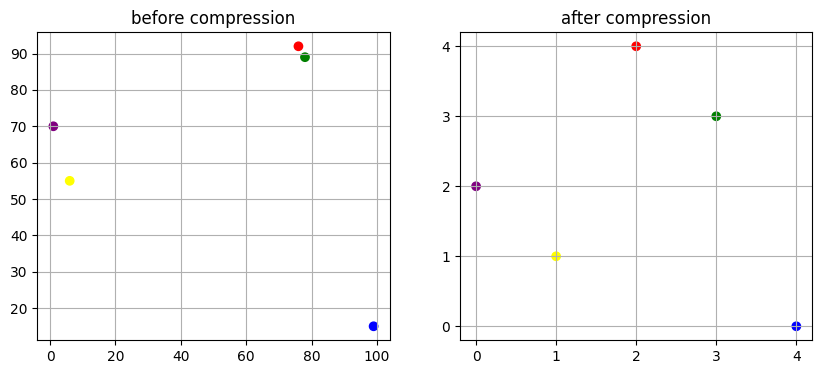

In [65]:
import random
import matplotlib.pyplot as plt

x = [random.randint(1, 100) for _ in range(5)]
y = [random.randint(1, 100) for _ in range(5)]

compressed_x, compressed_y = compress2d(x, y)

_colors = ['red', 'green', 'blue', 'yellow', 'purple']
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].scatter(x, y, c=_colors)
ax[1].scatter(list(map(compressed_x.get, x)),
              list(map(compressed_y.get, y)),
              c=_colors)
ax[0].grid()
ax[1].grid()
ax[1].set_xticks(range(0, 5))
ax[1].set_yticks(range(0, 5))
ax[0].set_title('before compression')
ax[1].set_title('after compression')


In [28]:
# 領域の個数

W: int
H: int
N: int

X1: list[int]
X2: list[int]
Y1: list[int]
Y2: list[int]


def bfs(y, x):
    ...


def compress(x1, x2, w):
    xs = []
    for i in range(N):
        for d in range(-1, 2):
            tx1 = x1[i] + d
            tx2 = x2[i] + d
            if 1 <= tx1 <= w:
                xs.append(tx1)
            if 1 <= tx2 <= w:
                xs.append(tx2)
    xs = {v: i for i, v in enumerate(sorted(set(xs)))}
    for i in range(N):
        x1[i] = xs.get(x1[i])
        x2[i] = xs.get(x2[i])
    return len(xs)


def solve() -> None:
    w = compress(X1, X2, W)
    h = compress(Y1, Y2, H)

    fld = [[0] * w for _ in range(h)]
    for i in range(N):
        for y in range(Y1[i], Y2[i] + 1):
            for x in range(X1[i], X2[i] + 1):
                fld[y][x] = 1

    ans = 0
    for y in range(h):
        for x in range(w):
            if fld[y][x]:
                continue
            ans += 1
            bfs(y, x)


In [29]:
W = 10
H = 10
N = 5
X1 = [1, 1, 4, 9, 10]
X2 = [6, 10, 4, 9, 10]
Y1 = [4, 8, 1, 1, 6]
Y2 = [4, 8, 10, 5, 10]

solve()